# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [238]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [239]:
data = pd.read_csv("data/compresive_strength_concrete.csv")
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [240]:
cols = ['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7', 'comp8', 'label']

data.columns = cols

data

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,label
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [241]:
data.label = data.label.astype('int64')
data

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,label
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32


In [242]:
data.describe()

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,label
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.319417
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705298
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,45.750000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.000000


In [243]:
np.unique(data.isna())

array([False])

In [244]:
np.unique(data.duplicated())

array([False,  True])

In [245]:
data = data.drop_duplicates()
data

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,label
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32


In [246]:
feature_x = data.loc[:, 'comp1':'comp8']
feature_x

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [247]:
label_y = data['label']


In [248]:
feature_x.describe()   # different conponants have different ranges which means need to normalize them.

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [249]:
mean = feature_x.mean(axis = 0)
std = feature_x.std(axis = 0)

feature_x -= mean
feature_x /= std

In [250]:
feature_x

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8
0,2.504869,-0.836054,-0.864944,-0.940766,-0.596833,0.845881,-1.203482,-0.280173
1,2.504869,-0.836054,-0.864944,-0.940766,-0.596833,1.039231,-1.203482,-0.280173
2,0.516259,0.817638,-0.864944,2.152114,-1.019133,-0.546236,-2.224139,3.516818
3,0.516259,0.817638,-0.864944,2.152114,-1.019133,-0.546236,-2.224139,5.007372
4,-0.766993,0.700429,-0.864944,0.465088,-1.019133,0.051859,0.657349,4.928921
...,...,...,...,...,...,...,...,...
1025,-0.021384,0.510109,0.541423,-0.115998,0.484254,-1.344126,-0.054621,-0.280173
1026,0.417547,-0.836054,0.935455,0.652536,0.737634,-2.016982,0.506740,-0.280173
1027,-1.247135,0.781663,0.826435,0.497892,0.011278,-1.056679,0.091009,-0.280173
1028,-1.145548,1.330573,-0.864944,-0.303445,0.889661,0.196226,0.201788,-0.280173


In [251]:
# 70% training (samples and lables)
# 30% testing 
train_data = feature_x[:((len(feature_x) * 70) // 100)]
test_data = feature_x[((len(feature_x) * 70) // 100):]

train_label = label_y[:((len(label_y) * 70) // 100)] 
test_label = label_y[((len(label_y) * 70) // 100):]

In [252]:
# 50% training(Samples,Labels) and 20% Validation Data(Samples,Labels).

val_x = train_data[:((len(train_data) * 20) // 100)]     # split data into 20%  for validation
val_y = train_label[:((len(train_label) * 20) // 100)]

train_x = train_data[((len(train_data) * 20) // 100):]      # split data into 50%  for training
train_y = train_label[((len(train_label) * 20) // 100):]

In [253]:
print(train_x.shape)
print(train_y.shape)

(563, 8)
(563,)


In [254]:
print(test_data.shape)
print(test_label.shape)

(302, 8)
(302,)


In [316]:
from keras import models
from keras import layers
from keras import regularizers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(train_x.shape[1],)))
#     model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
#     model.add(layers.Dense(10, activation='relu'))
#     model.add(layers.Dense(, activation='relu'))
#     model.add(layers.Dense(6, activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
    return model

In [317]:
model = build_model()

In [318]:
model.fit(train_x, train_y, epochs = 100, validation_data=(val_x, val_y))

Train on 563 samples, validate on 140 samples
Epoch 1/100
563/563 [==============================] - 0s 513us/step - loss: 1359.5720 - acc: 0.0018 - val_loss: 2323.8180 - val_acc: 0.0000e+00
Epoch 2/100
563/563 [==============================] - 0s 58us/step - loss: 1341.7227 - acc: 0.0018 - val_loss: 2292.6074 - val_acc: 0.0000e+00
Epoch 3/100
563/563 [==============================] - 0s 64us/step - loss: 1325.2364 - acc: 0.0000e+00 - val_loss: 2261.2395 - val_acc: 0.0000e+00
Epoch 4/100
563/563 [==============================] - 0s 58us/step - loss: 1308.0325 - acc: 0.0018 - val_loss: 2230.7048 - val_acc: 0.0000e+00
Epoch 5/100
563/563 [==============================] - 0s 59us/step - loss: 1289.5335 - acc: 0.0036 - val_loss: 2198.2889 - val_acc: 0.0000e+00
Epoch 6/100
563/563 [==============================] - 0s 59us/step - loss: 1270.1416 - acc: 0.0053 - val_loss: 2166.5381 - val_acc: 0.0000e+00
Epoch 7/100
563/563 [==============================] - 0s 64us/step - loss: 1249.6776

563/563 [==============================] - 0s 54us/step - loss: 163.6411 - acc: 0.0320 - val_loss: 299.0201 - val_acc: 0.0214
Epoch 59/100
563/563 [==============================] - 0s 54us/step - loss: 161.5852 - acc: 0.0266 - val_loss: 299.2418 - val_acc: 0.0143
Epoch 60/100
563/563 [==============================] - 0s 48us/step - loss: 159.8109 - acc: 0.0266 - val_loss: 301.5100 - val_acc: 0.0071
Epoch 61/100
563/563 [==============================] - 0s 48us/step - loss: 157.8415 - acc: 0.0266 - val_loss: 303.7507 - val_acc: 0.0214
Epoch 62/100
563/563 [==============================] - 0s 46us/step - loss: 156.1285 - acc: 0.0249 - val_loss: 303.6986 - val_acc: 0.0143
Epoch 63/100
563/563 [==============================] - 0s 47us/step - loss: 154.2928 - acc: 0.0231 - val_loss: 302.1632 - val_acc: 0.0214
Epoch 64/100
563/563 [==============================] - 0s 49us/step - loss: 152.6453 - acc: 0.0284 - val_loss: 303.5431 - val_acc: 0.0071
Epoch 65/100
563/563 [==================

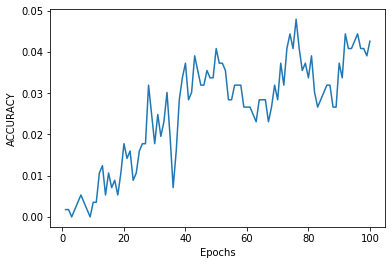

In [321]:
acc = model.history.history['acc']
plt.plot(range(1, len(acc) + 1), acc)
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.show()

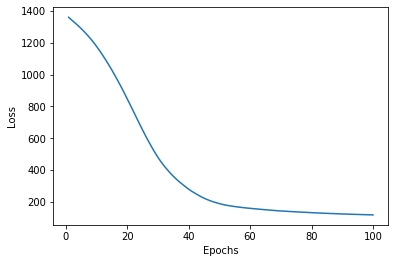

In [322]:
loss = model.history.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [323]:
results = model.evaluate(test_data, test_label)
results

302/302 [==============================] - 0s 43us/step


[133.19843196237323, 0.026490066200494766]

In [327]:
model.predict(test_data[-10:])

array([[30.009842],
       [23.679325],
       [25.38706 ],
       [33.45118 ],
       [35.0149  ],
       [33.62153 ],
       [27.776596],
       [23.915237],
       [25.832787],
       [25.376503]], dtype=float32)

In [328]:
test_label[-10:]

1020    42
1021    31
1022    41
1023    39
1024    37
1025    44
1026    31
1027    23
1028    32
1029    32
Name: label, dtype: int64

In [329]:
k = 4
num_val_samples = len(train_data) // k
# num_epochs = 500
num_epochs = 100
all_history = []
for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    
    val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]],
            axis=0)
    
    partial_train_targets = np.concatenate(
            [train_label[:i * num_val_samples],
            train_label[(i + 1) * num_val_samples:]],
            axis=0)
    
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    all_history.append(model.history.history)
    if k == i+1:
        print("-------------Training Completed-------------")

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
-------------Training Completed-------------


In [330]:
all_acc = []
all_loss = []
for i in all_history:
    all_acc.append(i['acc'])
    all_loss.append(i['loss'])

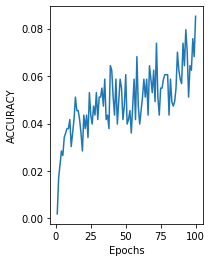

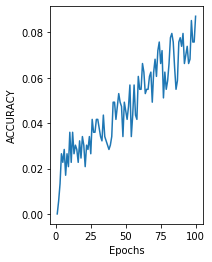

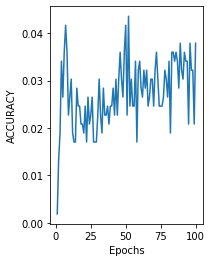

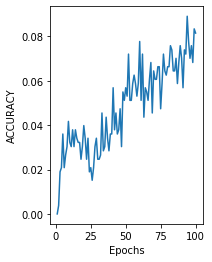

In [331]:
acc = all_acc
for a in acc:
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(a) + 1), a)
    plt.xlabel('Epochs')
    plt.ylabel('ACCURACY')
    plt.show()

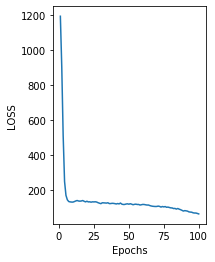

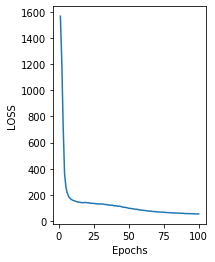

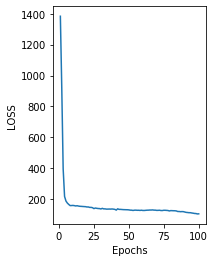

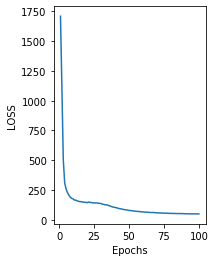

In [332]:
loss = all_loss
for a in loss:
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(a) + 1), a)
    plt.xlabel('Epochs')
    plt.ylabel('LOSS')
    plt.show()

In [335]:
model.predict(test_data[-10:])

array([[41.681858],
       [33.372387],
       [39.954906],
       [47.153263],
       [42.06187 ],
       [45.33881 ],
       [40.00196 ],
       [34.053455],
       [36.929066],
       [37.770573]], dtype=float32)

In [336]:
test_label[-10:]

1020    42
1021    31
1022    41
1023    39
1024    37
1025    44
1026    31
1027    23
1028    32
1029    32
Name: label, dtype: int64

In [337]:
results1 = model.evaluate(test_data, test_label)

302/302 [==============================] - 0s 405us/step


In [338]:
results1

[99.63683690456365, 0.0397351011633873]

In [ ]:
s